In [1]:
import tensorflow as tf
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [3]:
reloadModel = tf.keras.models.load_model('C:\Temp\ModelH5\MelanomaModelOptimized.h5')

In [5]:
dataFolder = 'C:\Temp\Test_Dataset'
imageWidth = 256
imageHeight = 256
batchSize = 32

In [7]:
testDataSet = tf.keras.utils.image_dataset_from_directory(dataFolder, seed=312, batch_size=batchSize, image_size=(imageWidth, imageHeight))

Found 4039 files belonging to 2 classes.


In [8]:
modelLoss, modelAccuracy = reloadModel.evaluate(testDataSet)
print('Test Accuracy: ', modelAccuracy)
print('Test Loss', modelLoss)

127/127 [==============================] - 21s 156ms/step - loss: 0.3905 - accuracy: 0.8289
Test Accuracy:  0.8289180397987366
Test Loss 0.390475869178772


In [9]:
actualLabels = []
predictedLabels = []

for image, label in testDataSet:
   prediction = reloadModel.predict(image)
   actualLabels.append(label)
   returnValue = np.argmax(prediction, axis = -1)
   predictedLabels.append(returnValue)

actualLabels = tf.concat([item for item in actualLabels], axis = 0)
predictedLabels = tf.concat([item for item in predictedLabels], axis = 0)

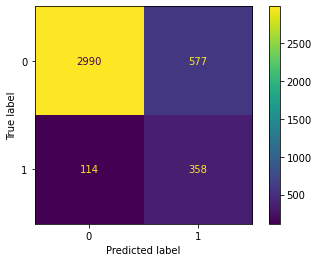

In [10]:
ConfusionMatrixDisplay.from_predictions(actualLabels, predictedLabels)
plt.show()

[[0.83823942 0.16176058]
 [0.24152542 0.75847458]]


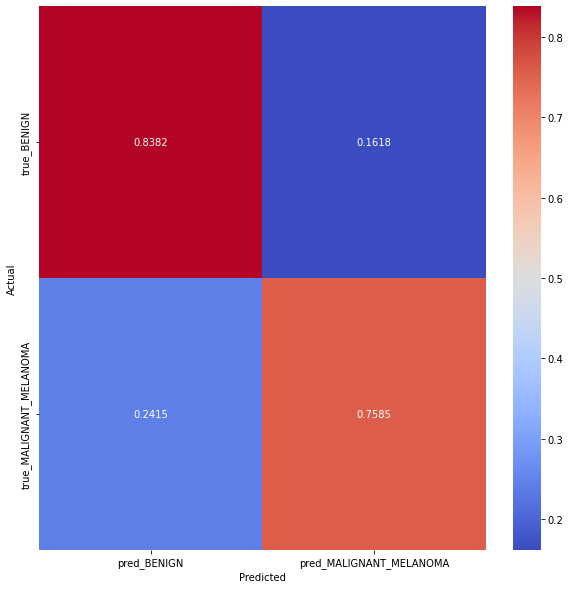

In [11]:
classNames = ['BENIGN', 'MALIGNANT_MELANOMA']
confusionMatrix = confusion_matrix(actualLabels, predictedLabels)
confusionMatrix = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]
print(confusionMatrix)

fig, ax = plt.subplots(figsize=(10,10))
sb.heatmap(confusionMatrix, annot=True, fmt='.4f', xticklabels=[f"pred_{c}" for c in classNames], yticklabels=[f"true_{c}" for c in classNames], cmap="coolwarm")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

ROC AUC: 0.7984


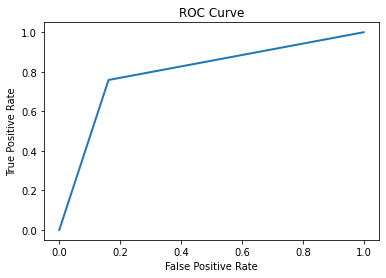

In [12]:
plt.figure()
falsePositiveRate, truePositiveRate, _ = roc_curve(actualLabels, predictedLabels)

rocAUC = auc(falsePositiveRate, truePositiveRate)
print(f"ROC AUC: {rocAUC:.4f}")

plt.plot(falsePositiveRate, truePositiveRate, lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()